In [1]:
import pandas as pd
import re 
import matplotlib.pyplot as plt
import math as m

In [2]:
df = pd.read_csv("C:\\Users\\braju\\OneDrive\\Desktop\\marketing_Data.csv")
df

ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0     6/16/14        0       189  ...                  6   
1            0     6/15/14        0       464  ...                  7   
2            1     5/13/14        0       134  ...                  5   
3            1  05-11-2014        0        10  ...                  2   
4            0  04-08-2014        0         6  ...                  2   
...        ...         ...      ...       ...  ...                ...   
2235         1  03-07-2013       99       372  ...                 11   
2236         0     1/22/13       99         5  ...                  3   
2237         0  12-03-2012       99       185  ...                  5   
2238         0    11/29/12       99       267  ...                 10   
2239         2  09-01-2012       99       169  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     1             0             0             0   
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           ...   
2235                  4             0             0             0   
2236                  8             0             0             0   
2237                  8             0             0             0   
2238                  3             0             0             0   
2239                  7             0             1             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
0                0             0         1         0       SP  
1                0             1         1         0       CA  
2                0             0         0         0       US  
3                0             0         0         0      AUS  
4                0             0         1         0       SP  
...            ...           ...       ...       ...      ...  
2235             0             0         0         0       US  
2236             0             0         0         0       SP  
2237             0             0         0         0       SP  
2238             0             0         0         0      IND  
2239             0             0         1         0       CA  

[2240 rows x 28 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
!pip install forex-python

In [5]:
df['Income'] = df['Income'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0     6/16/14        0       189  ...                  6   
1            0     6/15/14        0       464  ...                  7   
2            1     5/13/14        0       134  ...                  5   
3            1  05-11-2014        0        10  ...                  2   
4            0  04-08-2014        0         6  ...                  2   
...        ...         ...      ...       ...  ...                ...   
2235         1  03-07-2013       99       372  ...                 11   
2236         0     1/22/13       99         5  ...                  3   
2237         0  12-03-2012       99       185  ...                  5   
2238         0    11/29/12       99       267  ...                 10   
2239         2  09-01-2012       99       169  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     1             0             0             0   
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           ...   
2235                  4             0             0             0   
2236                  8             0             0             0   
2237                  8             0             0             0   
2238                  3             0             0             0   
2239                  7             0             1             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
0                0             0         1         0       SP  
1                0             1         1         0       CA  
2                0             0         0         0       US  
3                0             0         0         0      AUS  
4                0             0         1         0       SP  
...            ...           ...       ...       ...      ...  
2235             0             0         0         0       US  
2236             0             0         0         0       SP  
2237             0             0         0         0       SP  
2238             0             0         0         0      IND  
2239             0             0         1         0       CA  

[2240 rows x 28 columns]

In [6]:
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
usd_to_inr_rate = 83
df['Income_in_INR'] = df['Income'] * usd_to_inr_rate
df

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\braju\AppData\Local\Temp\ipykernel_11624\3131628842.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0     6/16/14        0       189  ...                  1   
1            0     6/15/14        0       464  ...                  5   
2            1     5/13/14        0       134  ...                  2   
3            1  05-11-2014        0        10  ...                  7   
4            0  04-08-2014        0         6  ...                  7   
...        ...         ...      ...       ...  ...                ...   
2235         1  03-07-2013       99       372  ...                  4   
2236         0     1/22/13       99         5  ...                  8   
2237         0  12-03-2012       99       185  ...                  8   
2238         0    11/29/12       99       267  ...                  3   
2239         2  09-01-2012       99       169  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             1   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                1             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             0             0   
2237             0             0             0             0             0   
2238             0             0             0             0             0   
2239             0             1             1             0             0   

      Response  Complain  Country  Income_in_INR  
0            1         0       SP      7041305.0  
1            1         0       CA      4738553.0  
2            0         0       US      5583161.0  
3            0         0      AUS      2695342.0  
4            1         0       SP      1782342.0  
...        ...       ...      ...            ...  
2235         0         0       US      5517508.0  
2236         0         0       SP      2577648.0  
2237         0         0       SP      3843730.0  
2238         0         0      IND      5462977.0  
2239         1         0       CA      7874293.0  

[2240 rows x 29 columns]

In [7]:
df['Income'] = df['Income'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0     6/16/14        0       189  ...                  1   
1            0     6/15/14        0       464  ...                  5   
2            1     5/13/14        0       134  ...                  2   
3            1  05-11-2014        0        10  ...                  7   
4            0  04-08-2014        0         6  ...                  7   
...        ...         ...      ...       ...  ...                ...   
2235         1  03-07-2013       99       372  ...                  4   
2236         0     1/22/13       99         5  ...                  8   
2237         0  12-03-2012       99       185  ...                  8   
2238         0    11/29/12       99       267  ...                  3   
2239         2  09-01-2012       99       169  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             1   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                1             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             0             0   
2237             0             0             0             0             0   
2238             0             0             0             0             0   
2239             0             1             1             0             0   

      Response  Complain  Country  Income_in_INR  
0            1         0       SP      7041305.0  
1            1         0       CA      4738553.0  
2            0         0       US      5583161.0  
3            0         0      AUS      2695342.0  
4            1         0       SP      1782342.0  
...        ...       ...      ...            ...  
2235         0         0       US      5517508.0  
2236         0         0       SP      2577648.0  
2237         0         0       SP      3843730.0  
2238         0         0      IND      5462977.0  
2239         1         0       CA      7874293.0  

[2240 rows x 29 columns]

In [8]:
df['min income'] = df['Income_in_INR'].min()
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0     6/16/14        0       189  ...             0   
1            0     6/15/14        0       464  ...             0   
2            1     5/13/14        0       134  ...             0   
3            1  05-11-2014        0        10  ...             0   
4            0  04-08-2014        0         6  ...             1   
...        ...         ...      ...       ...  ...           ...   
2235         1  03-07-2013       99       372  ...             0   
2236         0     1/22/13       99         5  ...             0   
2237         0  12-03-2012       99       185  ...             0   
2238         0    11/29/12       99       267  ...             0   
2239         2  09-01-2012       99       169  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
0                0             0             0             0         1   
1                0             0             0             1         1   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         1   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             0             0         0   
2237             0             0             0             0         0   
2238             0             0             0             0         0   
2239             1             1             0             0         1   

      Complain  Country  Income_in_INR  min income  
0            0       SP      7041305.0    143590.0  
1            0       CA      4738553.0    143590.0  
2            0       US      5583161.0    143590.0  
3            0      AUS      2695342.0    143590.0  
4            0       SP      1782342.0    143590.0  
...        ...      ...            ...         ...  
2235         0       US      5517508.0    143590.0  
2236         0       SP      2577648.0    143590.0  
2237         0       SP      3843730.0    143590.0  
2238         0      IND      5462977.0    143590.0  
2239         0       CA      7874293.0    143590.0  

[2240 rows x 30 columns]

In [9]:
df['max income'] = df['Income_in_INR'].max()
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0     6/16/14        0       189  ...             0   
1            0     6/15/14        0       464  ...             0   
2            1     5/13/14        0       134  ...             0   
3            1  05-11-2014        0        10  ...             0   
4            0  04-08-2014        0         6  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  03-07-2013       99       372  ...             0   
2236         0     1/22/13       99         5  ...             0   
2237         0  12-03-2012       99       185  ...             0   
2238         0    11/29/12       99       267  ...             0   
2239         2  09-01-2012       99       169  ...             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  \
0                0             0             0         1         0       SP   
1                0             0             1         1         0       CA   
2                0             0             0         0         0       US   
3                0             0             0         0         0      AUS   
4                0             0             0         1         0       SP   
...            ...           ...           ...       ...       ...      ...   
2235             0             0             0         0         0       US   
2236             0             0             0         0         0       SP   
2237             0             0             0         0         0       SP   
2238             0             0             0         0         0      IND   
2239             1             0             0         1         0       CA   

      Income_in_INR  min income  max income  
0         7041305.0    143590.0  55333278.0  
1         4738553.0    143590.0  55333278.0  
2         5583161.0    143590.0  55333278.0  
3         2695342.0    143590.0  55333278.0  
4         1782342.0    143590.0  55333278.0  
...             ...         ...         ...  
2235      5517508.0    143590.0  55333278.0  
2236      2577648.0    143590.0  55333278.0  
2237      3843730.0    143590.0  55333278.0  
2238      5462977.0    143590.0  55333278.0  
2239      7874293.0    143590.0  55333278.0  

[2240 rows x 31 columns]

In [10]:
df['avg income'] = df['Income_in_INR'].mean()
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0     6/16/14        0       189  ...             0   
1            0     6/15/14        0       464  ...             0   
2            1     5/13/14        0       134  ...             0   
3            1  05-11-2014        0        10  ...             0   
4            0  04-08-2014        0         6  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  03-07-2013       99       372  ...             0   
2236         0     1/22/13       99         5  ...             0   
2237         0  12-03-2012       99       185  ...             0   
2238         0    11/29/12       99       267  ...             0   
2239         2  09-01-2012       99       169  ...             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Income_in_INR  \
0                0             0         1         0       SP      7041305.0   
1                0             1         1         0       CA      4738553.0   
2                0             0         0         0       US      5583161.0   
3                0             0         0         0      AUS      2695342.0   
4                0             0         1         0       SP      1782342.0   
...            ...           ...       ...       ...      ...            ...   
2235             0             0         0         0       US      5517508.0   
2236             0             0         0         0       SP      2577648.0   
2237             0             0         0         0       SP      3843730.0   
2238             0             0         0         0      IND      5462977.0   
2239             0             0         1         0       CA      7874293.0   

      min income  max income    avg income  
0       143590.0  55333278.0  4.336522e+06  
1       143590.0  55333278.0  4.336522e+06  
2       143590.0  55333278.0  4.336522e+06  
3       143590.0  55333278.0  4.336522e+06  
4       143590.0  55333278.0  4.336522e+06  
...          ...         ...           ...  
2235    143590.0  55333278.0  4.336522e+06  
2236    143590.0  55333278.0  4.336522e+06  
2237    143590.0  55333278.0  4.336522e+06  
2238    143590.0  55333278.0  4.336522e+06  
2239    143590.0  55333278.0  4.336522e+06  

[2240 rows x 32 columns]

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', dayfirst=True)
df

C:\Users\braju\AppData\Local\Temp\ipykernel_11624\1937360743.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', dayfirst=True)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  2014-06-16        0       189  ...             0   
1            0  2014-06-15        0       464  ...             0   
2            1  2014-05-13        0       134  ...             0   
3            1  2014-11-05        0        10  ...             0   
4            0  2014-08-04        0         6  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-07-03       99       372  ...             0   
2236         0  2013-01-22       99         5  ...             0   
2237         0  2012-03-12       99       185  ...             0   
2238         0  2012-11-29       99       267  ...             0   
2239         2  2012-01-09       99       169  ...             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Income_in_INR  \
0                0             0         1         0       SP      7041305.0   
1                0             1         1         0       CA      4738553.0   
2                0             0         0         0       US      5583161.0   
3                0             0         0         0      AUS      2695342.0   
4                0             0         1         0       SP      1782342.0   
...            ...           ...       ...       ...      ...            ...   
2235             0             0         0         0       US      5517508.0   
2236             0             0         0         0       SP      2577648.0   
2237             0             0         0         0       SP      3843730.0   
2238             0             0         0         0      IND      5462977.0   
2239             0             0         1         0       CA      7874293.0   

      min income  max income    avg income  
0       143590.0  55333278.0  4.336522e+06  
1       143590.0  55333278.0  4.336522e+06  
2       143590.0  55333278.0  4.336522e+06  
3       143590.0  55333278.0  4.336522e+06  
4       143590.0  55333278.0  4.336522e+06  
...          ...         ...           ...  
2235    143590.0  55333278.0  4.336522e+06  
2236    143590.0  55333278.0  4.336522e+06  
2237    143590.0  55333278.0  4.336522e+06  
2238    143590.0  55333278.0  4.336522e+06  
2239    143590.0  55333278.0  4.336522e+06  

[2240 rows x 32 columns]

In [12]:

total_customers = len(df)
AcceptedCmp5_rate = df['AcceptedCmp5'].sum() / total_customers
AcceptedCmp1_rate = df['AcceptedCmp1'].sum() / total_customers
AcceptedCmp2_rate = df['AcceptedCmp2'].sum() / total_customers
print(f"Acceptance rate for Campaign 5: {AcceptedCmp5_rate * 100:.2f}%")
print(f"Acceptance rate for Campaign 1: {AcceptedCmp1_rate * 100:.2f}%")
print(f"Acceptance rate for Campaign 2: {AcceptedCmp2_rate * 100:.2f}%")

Acceptance rate for Campaign 5: 7.28%
Acceptance rate for Campaign 1: 6.43%
Acceptance rate for Campaign 2: 1.34%


In [28]:
df.drop(columns=['status_married', 'status_divorced'], inplace=True)

In [30]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Response  \
0            0  2014-06-16        0       189  ...             0         1   
1            0  2014-06-15        0       464  ...             1         1   
2            1  2014-05-13        0       134  ...             0         0   
3            1  2014-11-05        0        10  ...             0         0   
4            0  2014-08-04        0         6  ...             0         1   
...        ...         ...      ...       ...  ...           ...       ...   
2235         1  2013-07-03       99       372  ...             0         0   
2236         0  2013-01-22       99         5  ...             0         0   
2237         0  2012-03-12       99       185  ...             0         0   
2238         0  2012-11-29       99       267  ...             0         0   
2239         2  2012-01-09       99       169  ...             0         1   

      Complain  Country  Income_in_INR  min income  max income    avg income  \
0            0       SP      7041305.0    143590.0  55333278.0  4.336522e+06   
1            0       CA      4738553.0    143590.0  55333278.0  4.336522e+06   
2            0       US      5583161.0    143590.0  55333278.0  4.336522e+06   
3            0      AUS      2695342.0    143590.0  55333278.0  4.336522e+06   
4            0       SP      1782342.0    143590.0  55333278.0  4.336522e+06   
...        ...      ...            ...         ...         ...           ...   
2235         0       US      5517508.0    143590.0  55333278.0  4.336522e+06   
2236         0       SP      2577648.0    143590.0  55333278.0  4.336522e+06   
2237         0       SP      3843730.0    143590.0  55333278.0  4.336522e+06   
2238         0      IND      5462977.0    143590.0  55333278.0  4.336522e+06   
2239         0       CA      7874293.0    143590.0  55333278.0  4.336522e+06   

      material_status  status_single  
0            divorced          False  
1              single          False  
2             married          False  
3            together          False  
4              single          False  
...               ...            ...  
2235         divorced          False  
2236          married          False  
2237         divorced          False  
2238          married          False  
2239          married          False  

[2240 rows x 34 columns]

In [32]:
df.drop(columns=['material_status', 'status_single'], inplace=True)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  2014-06-16        0       189  ...             0   
1            0  2014-06-15        0       464  ...             0   
2            1  2014-05-13        0       134  ...             0   
3            1  2014-11-05        0        10  ...             0   
4            0  2014-08-04        0         6  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-07-03       99       372  ...             0   
2236         0  2013-01-22       99         5  ...             0   
2237         0  2012-03-12       99       185  ...             0   
2238         0  2012-11-29       99       267  ...             0   
2239         2  2012-01-09       99       169  ...             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Income_in_INR  \
0                0             0         1         0       SP      7041305.0   
1                0             1         1         0       CA      4738553.0   
2                0             0         0         0       US      5583161.0   
3                0             0         0         0      AUS      2695342.0   
4                0             0         1         0       SP      1782342.0   
...            ...           ...       ...       ...      ...            ...   
2235             0             0         0         0       US      5517508.0   
2236             0             0         0         0       SP      2577648.0   
2237             0             0         0         0       SP      3843730.0   
2238             0             0         0         0      IND      5462977.0   
2239             0             0         1         0       CA      7874293.0   

      min income  max income    avg income  
0       143590.0  55333278.0  4.336522e+06  
1       143590.0  55333278.0  4.336522e+06  
2       143590.0  55333278.0  4.336522e+06  
3       143590.0  55333278.0  4.336522e+06  
4       143590.0  55333278.0  4.336522e+06  
...          ...         ...           ...  
2235    143590.0  55333278.0  4.336522e+06  
2236    143590.0  55333278.0  4.336522e+06  
2237    143590.0  55333278.0  4.336522e+06  
2238    143590.0  55333278.0  4.336522e+06  
2239    143590.0  55333278.0  4.336522e+06  

[2240 rows x 32 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

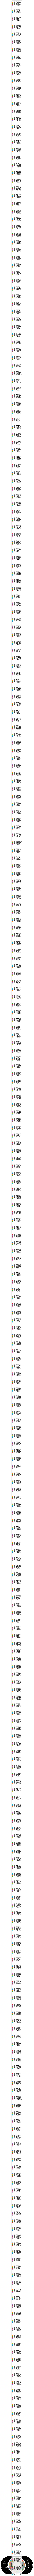

In [50]:
x = df['MntWines']
labels = df['Income_in_INR'].apply(lambda x: f'Income: {x}')  
plt.pie(x, labels=labels, autopct='%1.1f%%') 
plt.title('Mnt Wines with Income')
plt.legend()
plt.show()

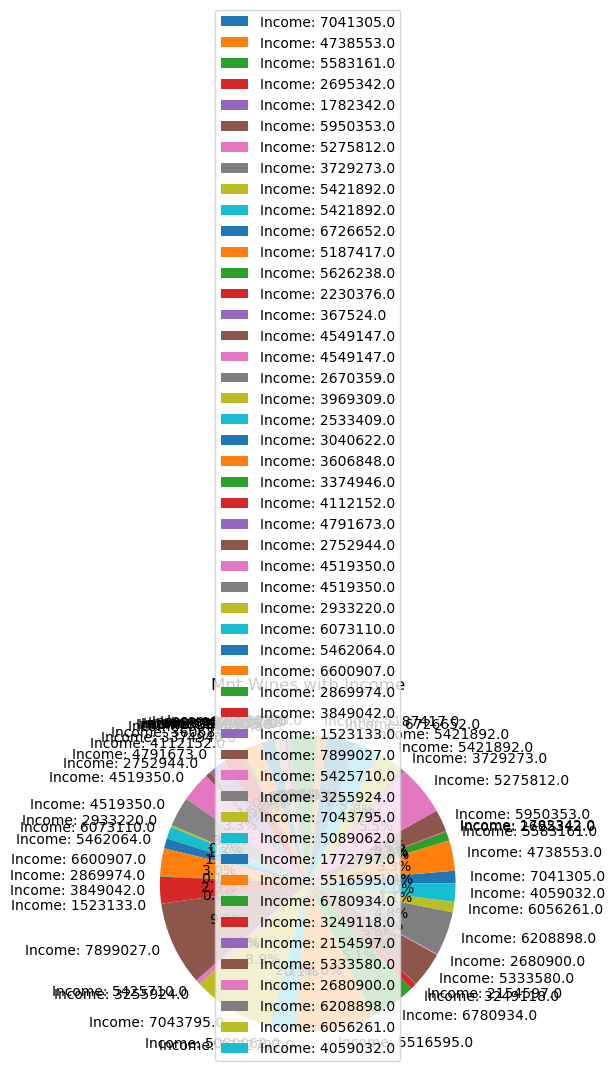

In [56]:
x = df['MntWines'].head(50)
labels = df['Income_in_INR'].head(50).apply(lambda x: f'Income: {x}')  
plt.pie(x, labels=labels, autopct='%1.1f%%') 
plt.title('Mnt Wines with Income')
plt.legend()
plt.show()

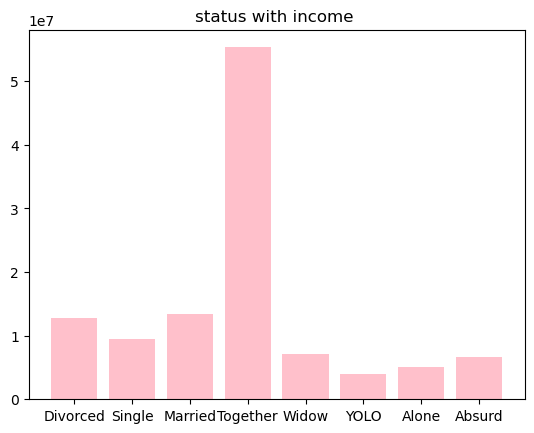

In [64]:
x = df['Marital_Status']
y = df['Income_in_INR']
plt.bar (x,y,label = 'sample' , color = 'pink')
plt.title('status with income ')
plt.show()

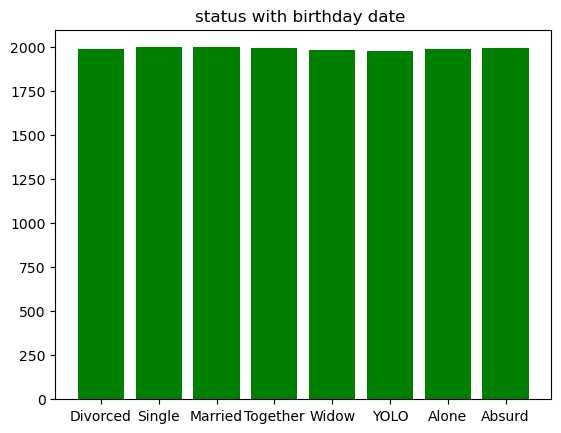

In [66]:
x = df['Marital_Status']
y = df['Year_Birth']
plt.bar (x,y,label = 'sample' , color = 'green')
plt.title('status with birthday date ')
plt.show()

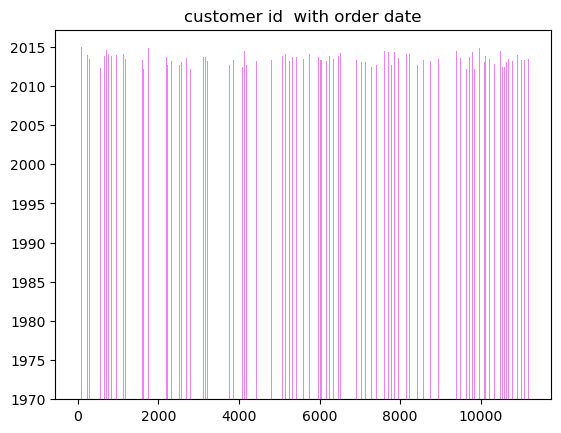

In [68]:
x = df['ID']
y = df['Dt_Customer']
plt.bar (x,y,label = 'sample' , color = 'violet')
plt.title('customer id  with order date')
plt.show()

In [74]:
df.to_csv("C:/Users/braju/OneDrive/Desktop/updated_marketing_Data.csv",index=False)